In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv('../artifacts/train.csv')
test_data = pd.read_csv('../artifacts/test.csv')

In [3]:
df = pd.concat([train_data, test_data], axis=0)

In [4]:
df = df.drop(['id'],axis=1)

In [5]:
df['Gender']=df['Gender'].map({'Male': 1, 'Female':0})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19174664 entries, 0 to 7669865
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                int64  
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1.7+ GB


In [7]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     9971954
< 1 Year     8405400
> 2 Years     797310
Name: count, dtype: int64

In [8]:
veh= pd.get_dummies(df['Vehicle_Age'], dtype=int, drop_first=True)

In [9]:
df = pd.concat([df, veh], axis=1)

In [10]:
df.drop(['Vehicle_Age'], axis=1, inplace=True)

In [11]:
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No': 0})

In [12]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,< 1 Year,> 2 Years
0,1,21,1,35.0,0,1,65101.0,124.0,187,0.0,0,0
1,1,43,1,28.0,0,1,58911.0,26.0,288,1.0,0,1
2,0,25,1,14.0,1,0,38043.0,152.0,254,0.0,1,0
3,0,35,1,1.0,0,1,2630.0,156.0,76,0.0,0,0
4,0,36,1,15.0,1,0,31951.0,152.0,294,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7669861,1,57,1,28.0,0,1,51661.0,124.0,109,NaN,0,0
7669862,1,28,1,50.0,1,0,25651.0,152.0,184,NaN,1,0
7669863,1,47,1,33.0,1,0,2630.0,138.0,63,NaN,0,0
7669864,1,30,1,28.0,0,1,38866.0,124.0,119,NaN,1,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19174664 entries, 0 to 7669865
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                int64  
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Damage        int64  
 6   Annual_Premium        float64
 7   Policy_Sales_Channel  float64
 8   Vintage               int64  
 9   Response              float64
 10  < 1 Year              int32  
 11  > 2 Years             int32  
dtypes: float64(4), int32(2), int64(6)
memory usage: 1.7 GB


In [14]:
df['Annual_Premium'] = np.log1p(train_data['Annual_Premium'])

In [15]:
features = list(df.columns)
features.remove('Response')

In [16]:
df_train = df[~df['Response'].isnull()]
df_test = df[df['Response'].isnull()]

In [17]:
sc= StandardScaler()
df_train[features] = sc.fit_transform(df_train[features])


C:\Users\snirt\AppData\Local\Temp\ipykernel_24736\1014902053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[features] = sc.fit_transform(df_train[features])


In [18]:
df_test[features] = sc.transform(df_test[features])

C:\Users\snirt\AppData\Local\Temp\ipykernel_24736\3854255551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[features] = sc.transform(df_test[features])


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train['Response'], test_size=0.3,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

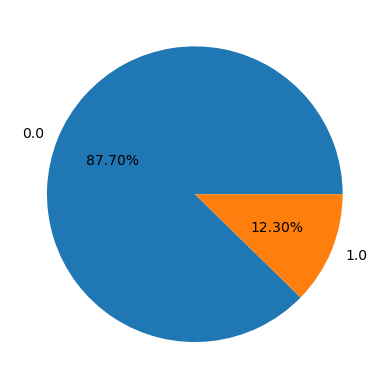

In [26]:
plt.pie(y_train.value_counts().values, labels=y_train.value_counts().index, autopct='%.2f%%')
plt.show()

In [28]:
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

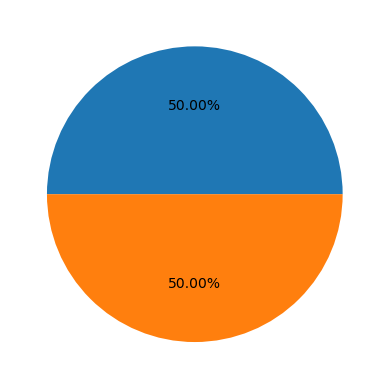

In [32]:
plt.pie(y_train_s.value_counts().values, autopct='%.2f%%')
plt.show()

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [45]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [79]:
history = model.fit(X_train_s, y_train_s, validation_data=[X_val, y_val], epochs=2)

Epoch 1/2
441417/441417 ━━━━━━━━━━━━━━━━━━━━ 784s 2ms/step - accuracy: 0.8015 - loss: 0.4166 - val_accuracy: 0.7163 - val_loss: 0.4556
Epoch 2/2
441417/441417 ━━━━━━━━━━━━━━━━━━━━ 762s 2ms/step - accuracy: 0.8016 - loss: 0.4162 - val_accuracy: 0.6990 - val_loss: 0.4721


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8053358 entries, 5487999 to 6423388
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                float64
 1   Age                   float64
 2   Driving_License       float64
 3   Region_Code           float64
 4   Previously_Insured    float64
 5   Vehicle_Damage        float64
 6   Annual_Premium        float64
 7   Policy_Sales_Channel  float64
 8   Vintage               float64
 9   < 1 Year              float64
 10  > 2 Years             float64
dtypes: float64(11)
memory usage: 737.3 MB


In [42]:
for i in features:
    X_train_s[i] = X_train_s[i].astype('float16')
    X_val[i] = X_val[i].astype('float16')

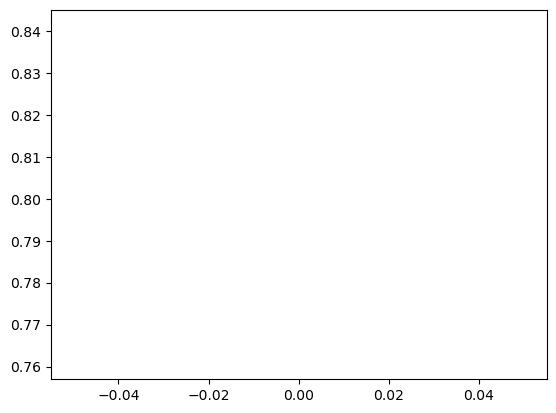

In [51]:
plt.plot(history.history['accuracy'])

In [48]:
history

In [50]:
history.history

{'accuracy': [0.8010213971138],
 'loss': [0.4179863929748535],
 'val_accuracy': [0.7083454728126526],
 'val_loss': [0.4558861553668976]}

In [55]:
xgb_patams = {
        'max_depth': 13, 
        'min_child_weight': 5,
        'learning_rate': 0.02,
        'colsample_bytree': 0.6,         
        'max_bin': 3000, 
        'n_estimators': 1500 
}

In [62]:
model_xgb = XGBClassifier(**xgb_patams)
xgb=model_xgb.fit(X_train_s.values, y_train_s.values)

In [70]:
# validation accuracy
y_pred = model_xgb.predict(X_val)
accuracy_score(y_pred, y_val)

0.8421458869341493

In [72]:
y_pred1

array([0, 1, 1, ..., 1, 0, 1])

In [73]:
y_test

6272546    0.0
3321132    0.0
1124635    0.0
3595628    0.0
1352686    0.0
          ... 
5950135    0.0
9812636    0.0
629037     1.0
7213993    0.0
8246778    0.0
Name: Response, Length: 1725720, dtype: float64

In [77]:
y_val

3610971     0.0
1645249     0.0
8011449     0.0
6128466     1.0
10392046    0.0
           ... 
9268632     0.0
11435718    0.0
1200934     0.0
9595338     0.0
5189256     0.0
Name: Response, Length: 1725720, dtype: float64

In [78]:
y_test

6272546    0.0
3321132    0.0
1124635    0.0
3595628    0.0
1352686    0.0
          ... 
5950135    0.0
9812636    0.0
629037     1.0
7213993    0.0
8246778    0.0
Name: Response, Length: 1725720, dtype: float64